# Binary Classification models for iris dataset

## Logistic Regression

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



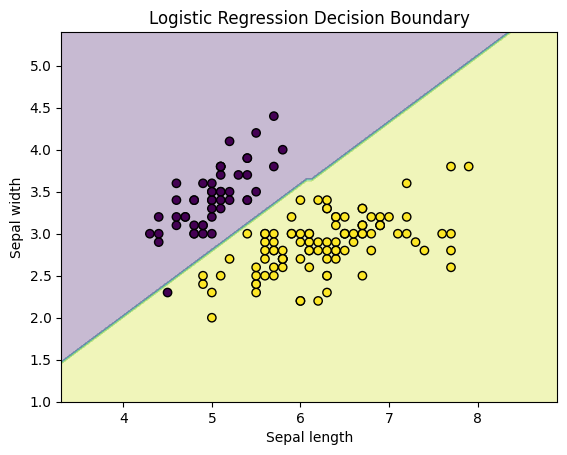

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Taking only the first two features for visualization
y = (iris.target != 0).astype(int)  # Binary classification: Setosa (0) vs Non-Setosa (1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features

"""
1) fit_transform() on training data:
    fit() computes the mean and standard deviation from the training set.
    transform() applies this scaling to standardize the training data.

2) transform() on test data (NOT fit_transform)

    We apply the same scaling (computed from training data) to the test set to maintain consistency.

3) For labels (y), we do not scale because they are categorical/class values, not continuous numerical features. 🚀
"""
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# params
params = {'penalty': 'l2',          # Regularization type ('l1' or 'l2')
            'C': 1.0,                 # Inverse of regularization strength
            'solver': 'liblinear',    # Solver for optimization
            'max_iter': 200}

# Train a Logistic Regression model
model_lr = LogisticRegression(**params)
model_lr.fit(X_train, y_train)

# Make predictions
y_pred = model_lr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model_lr.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Logistic Regression Decision Boundary")
plt.show()


In [2]:
# Get the report dict in a dictionary format
"""
We will use these metrics to log them in MLFlow
"""
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_dict

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10.0},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 20.0},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 30.0},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 30.0}}

# Dagshub Setup

In [3]:
import dagshub
dagshub.init(repo_owner='ppkhairn', repo_name='MLflow_', mlflow=True)

Accessing as ppkhairn

Initialized MLflow to track repo "ppkhairn/MLflow_"

Repository ppkhairn/MLflow_ initialized!

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()
print(os.getenv("MLFLOW_TRACKING_USERNAME"))
print(os.getenv("MLFLOW_TRACKING_PASSWORD"))
print(os.getenv("MLFLOW_TRACKING_URI"))


ppkhairn
509c184a24c2553b559940464df3ced34e78118f
https://dagshub.com/ppkhairn/MLflow_.mlflow


### MLFlow section

In [5]:
import mlflow
mlflow.set_experiment("Logistic with Iris")
"""
The uri or url here is the one we get after running "mlfow ui". So the mlflow ui should be 
running while we upload the metrics.
"""
# mlflow.set_tracking_uri("http://127.0.0.1:5000")

"""
We will log parameters, metrics and model
"""
with mlflow.start_run():
    mlflow.log_params(params)
    mlflow.log_metrics({
        'accuracy': report_dict['accuracy'],
        'recall_class_0': report_dict['0']['recall'],
        'recall_class_1': report_dict['1']['recall'],
        'f1_macro': report_dict['macro avg']['f1-score']
    })
    # mlflow.sklearn.log_model(model_lr, "Logistic Regression") # mlflow doesnt directly have model log function. Therefore using sklearn.

🏃 View run vaunted-robin-575 at: https://dagshub.com/ppkhairn/MLflow_.mlflow/#/experiments/0/runs/d6a7e1412efc4ec5bae42a208c69da63
🧪 View experiment at: https://dagshub.com/ppkhairn/MLflow_.mlflow/#/experiments/0


In [6]:
import mlflow
mlflow.set_experiment("Logistic with Iris-duplicate")
"""
The uri or url here is the one we get after running "mlfow ui". So the mlflow ui should be 
running while we upload the metrics.
"""
# mlflow.set_tracking_uri("http://127.0.0.1:5000")
# import os

# os.environ["MLFLOW_TRACKING_USERNAME"] = "ppkhairn"
# os.environ["MLFLOW_TRACKING_PASSWORD"] = "509c184a24c2553b559940464df3ced34e78118f"
# os.environ["MLFLOW_TRACKING_URI"] = "https://dagshub.com/ppkhairn/MLflow_.mlflow"

"""
We will log parameters, metrics and model
"""
with mlflow.start_run():
    mlflow.log_params(params)
    mlflow.log_metrics({
        'accuracy': report_dict['accuracy'],
        'recall_class_0': report_dict['0']['recall'],
        'recall_class_1': report_dict['1']['recall'],
        'f1_macro': report_dict['macro avg']['f1-score']
    })
    # mlflow.sklearn.log_model(model_lr, "Logistic Regression") # mlflow doesnt directly have model log function. Therefore using sklearn.

🏃 View run sneaky-bass-93 at: https://dagshub.com/ppkhairn/MLflow_.mlflow/#/experiments/2/runs/7ea1c050a38748a5b7994569aa06a485
🧪 View experiment at: https://dagshub.com/ppkhairn/MLflow_.mlflow/#/experiments/2


# Run multiple models

In [7]:
# Random Forest

import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import xgboost as xgb

# Load Iris dataset
data = load_wine()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Random Forest hyperparameters in a dictionary
params_lr = {
    'penalty': 'l2',          # Regularization type ('l1' or 'l2')
    'C': 1.0,                 # Inverse of regularization strength
    'solver': 'liblinear',    # Solver for optimization
    'max_iter': 200
}

params_rf = {
    'n_estimators': 100,
    'max_depth': 5,
    'random_state': 42,
    'max_features': 'sqrt',
    'min_samples_split': 2
}

params_svm = {
    'C': 1.0,
    'kernel': 'rbf',  # Radial Basis Function kernel
    'gamma': 'scale',
    'random_state': 42
}

params_xgb = {
    'objective': 'multi:softmax',  # Multi-class classification
    'num_class': 3,                # Number of classes in the dataset
    'max_depth': 6,                # Maximum depth of the tree
    'learning_rate': 0.1,          # Step size shrinkage
    'n_estimators': 100,           # Number of boosting rounds
    'eval_metric': 'mlogloss',     # Multi-class log loss
}

# Initialize Random Forest model with parameters
model_lr = LogisticRegression(**params_lr)
model_rf = RandomForestClassifier(**params_rf)
model_svm = SVC(**params_svm)
model_xgb = xgb.XGBClassifier(**params_xgb)

# Train the model
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_svm.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)

# Predictions
y_pred_lr = model_lr.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_svm = model_svm.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)


# Get classification report
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)


/home/pushkar/.pyenv/versions/mlflow_/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


In [8]:
import mlflow
model_names_ = ["Logistic Regression", "Random Forest", "SVM", "xgboost"]
params_name = [params_lr, params_rf, params_svm, params_xgb]
report_dict_list = [report_lr, report_rf, report_svm, report_xgb]
models_ = [model_lr, model_rf, model_svm, model_xgb]

mlflow.set_experiment("Multiple Classification Models")
# mlflow.set_tracking_uri("http://127.0.0.1:5000")

for i, model_n in enumerate(model_names_):

    with mlflow.start_run(run_name=model_n):
        mlflow.log_params(params_name[i])
        mlflow.log_metrics({
            'accuracy': report_dict_list[i]['accuracy'],
            'recall_class_0': report_dict_list[i]['0']['recall'],
            'recall_class_1': report_dict_list[i]['1']['recall'],
            'f1_macro': report_dict_list[i]['macro avg']['f1-score']
        })
        # if model_n == "xgboost":
        #     mlflow.xgboost.log_model(models_[i], model_n) # mlflow doesnt directly have model log function. Therefore using xgboost.
        # else:
        #     mlflow.sklearn.log_model(models_[i], model_n) # mlflow doesnt directly have model log function. Therefore using sklearn.

🏃 View run Logistic Regression at: https://dagshub.com/ppkhairn/MLflow_.mlflow/#/experiments/1/runs/99e3df8e2d394439ae203c939083744a
🧪 View experiment at: https://dagshub.com/ppkhairn/MLflow_.mlflow/#/experiments/1
🏃 View run Random Forest at: https://dagshub.com/ppkhairn/MLflow_.mlflow/#/experiments/1/runs/1cecf049c4594ffc8ac23354c598872d
🧪 View experiment at: https://dagshub.com/ppkhairn/MLflow_.mlflow/#/experiments/1
🏃 View run SVM at: https://dagshub.com/ppkhairn/MLflow_.mlflow/#/experiments/1/runs/3b73731904e4474fac8b4e6b47c2f66a
🧪 View experiment at: https://dagshub.com/ppkhairn/MLflow_.mlflow/#/experiments/1
🏃 View run xgboost at: https://dagshub.com/ppkhairn/MLflow_.mlflow/#/experiments/1/runs/adfbb4fe135249bdbebf244692e593f2
🧪 View experiment at: https://dagshub.com/ppkhairn/MLflow_.mlflow/#/experiments/1
